In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
x_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(len(x_data))
#y=mx+b
#m=0.5
#b=5
y_true=(0.5*x_data)+5+noise
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
my_data=pd.concat([x_df,y_df],axis=1)
my_data.head()


,X Data,Y
0,0.00000,4.598677
1,0.00001,7.065014
2,0.00002,6.604437
3,0.00003,4.422490
4,0.00004,6.007339


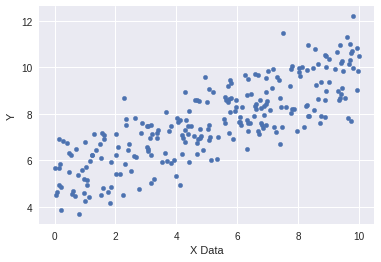

In [3]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')


In [4]:
batch_size=8
print(np.random.randn(2))


[-0.71384852  2.82799865]


In [5]:
m=tf.Variable(0.61692676)
b=tf.Variable(1.54499345)
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
y_model=m*xph+b
error=tf.reduce_sum(tf.square(yph-y_model))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)
init=tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  batches=10000
  for i in  range(batches):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m,model_b=sess.run([m,b])
  print(model_m,model_b)
  
  y_hat=x_data*model_m+model_b    

0.48189518 5.002145


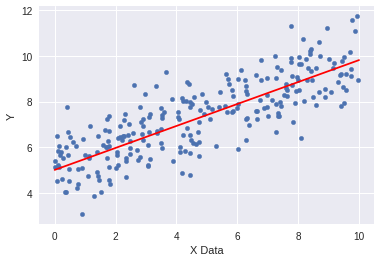

In [6]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')


In [0]:
feat_cols=[tf.feature_column.numeric_column('X',shape=[1])]

#construc linear regression model

estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

input_func=tf.estimator.inputs.numpy_input_fn({'X':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

train_input_func=tf.estimator.inputs.numpy_input_fn({'X':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

test_input_func=tf.estimator.inputs.numpy_input_fn({'X':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

#train estimator
estimator.train(input_fn=input_func,steps=1000)

#evaluate the model based on train data

train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

#evaluate the model based on test data

test_metrics=estimator.evaluate(input_fn=test_input_func,steps=100)


In [14]:
print("Training Data Metrics")

print(train_metrics)


print("Test Data Metrics")

print(test_metrics)

Training Data Metrics
{'average_loss': 1.1462057, 'label/mean': 7.4948997, 'loss': 9.169645, 'prediction/mean': 7.3239055, 'global_step': 1000}
Test Data Metrics
{'average_loss': 1.1455785, 'label/mean': 7.548057, 'loss': 9.164628, 'prediction/mean': 7.3573694, 'global_step': 1000}


In [15]:
#test model on new data
brand_new_data=np.linspace(0,10,10)

input_fn_predict=tf.estimator.inputs.numpy_input_fn({'X':brand_new_data},shuffle=False)

list(estimator.predict(input_fn=input_fn_predict))



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsx5trm05/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2903647], dtype=float32)},
 {'predictions': array([4.964181], dtype=float32)},
 {'predictions': array([5.6379967], dtype=float32)},
 {'predictions': array([6.311813], dtype=float32)},
 {'predictions': array([6.985629], dtype=float32)},
 {'predictions': array([7.659445], dtype=float32)},
 {'predictions': array([8.3332615], dtype=float32)},
 {'predictions': array([9.007077], dtype=float32)},
 {'predictions': array([9.680893], dtype=float32)},
 {'predictions': array([10.35471], dtype=float32)}]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsx5trm05/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


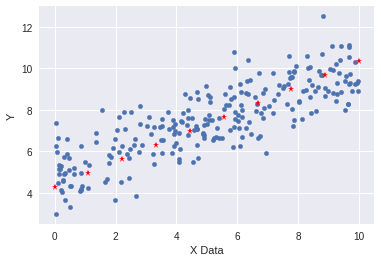

In [19]:
predictions=[]
for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

plt.plot(brand_new_data,predictions,'r*')
